<a href="https://colab.research.google.com/github/cerniello/Human-Instance-Segmentation/blob/master/AML_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorboardx==2.0
!pip install scipy==1.2.1
!pip install pybgs

     |████████████████████████████████| 204kB 9.5MB/s 
     |████████████████████████████████| 24.8MB 130kB/s 
ERROR: umap-learn 0.4.3 has requirement scipy>=1.3.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 860kB 14.3MB/s 
  Created wheel for pybgs: filename=pybgs-3.0.0.post2-cp36-cp36m-linux_x86_64.whl size=576517 sha256=328ce918c3084daf850b9fd5b9acde2b401270bd824332d4bf774ce41e935ac1
  Stored in directory: /root/.cache/pip/wheels/39/84/6b/21154fbbc184392b758861940092274514716d708f887aec42
Successfully built pybgs


In [2]:
!git clone https://github.com/cerniello/Human-Instance-Segmentation.git
%cd Human-Instance-Segmentation/ 

Cloning into 'Human-Instance-Segmentation'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 169 (delta 69), reused 61 (delta 17), pack-reused 0
Receiving objects: 100% (169/169), 20.72 MiB | 6.34 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/content/Human-Instance-Segmentation


In [3]:
!pip install gdown
!gdown --id 1_c8TsGlAJBijQJH_Xl4SOnJH9y_-pk76
!mkdir data/crowds_zara02_frames/
#!unzip -q data/crowds_zara02_frames.zip -d data/ 

Downloading...
From: https://drive.google.com/uc?id=1_c8TsGlAJBijQJH_Xl4SOnJH9y_-pk76
To: /content/Human-Instance-Segmentation/crowds_zara02.avi
63.5MB [00:01, 38.0MB/s]


In [0]:
import cv2
vidcap = cv2.VideoCapture('crowds_zara02.avi')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("data/crowds_zara02_frames/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  #print('Read a new frame: ', success)
  count += 1

In [10]:
!python run_masking_preprocessing.py --use_mask_rcnn=True --debug=True --pID=7 --homography=/content/Human-Instance-Segmentation/data/homography_matrix/ucy_zara02.txt

 - Download model
 - Create subfolders
 - Selecting the pictures with pID: 7
 - Homography matrix loaded
 - Founding bounding boxes using mask RCNN
 - I will mask with mask RCNN


In [11]:
!cd /content/Human-Instance-Segmentation/models/; chmod +x download_parent_model.sh
!cd /content/Human-Instance-Segmentation/models/; ./download_parent_model.sh

--2020-06-03 16:56:18--  https://data.vision.ee.ethz.ch/kmaninis/share/OSVOS/Downloads/models/pth_parent_model.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55456213 (53M) [application/zip]
Saving to: ‘pth_parent_model.zip’

pth_parent_model.zi 100%[===================>]  52.89M  9.50MB/s    in 7.5s    

2020-06-03 16:56:27 (7.05 MB/s) - ‘pth_parent_model.zip’ saved [55456213/55456213]

Archive:  pth_parent_model.zip
replace parent_epoch-239.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [24]:
!python run_OSVOS_pretrained.py --epochs=5 --output_folder="results" --batch_size=2 --seq_name='pID7'

 - Online training snapshots every: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Constructing OSVOS architecture..
Done initializing train_seqs Dataset
Done initializing val_seqs Dataset
 - n. batches per training epoch: 14, batchsize: 2
 - n. test images: 350
 - Start of Online Training, sequence: pID7
 - [Epoch: 1, numImages:     1]
 - Loss: 218.354196
 - [Epoch: 1, numImages:     2]
 - Loss: 262.303760
 - [Epoch: 1, numImages:     3]
 - Loss: 251.151283
 - [Epoch: 1, numImages:     4]
 - Loss: 149.694339
 - [Epoch: 1, numImages:     5]
 - Loss: 187.882185
 - [Epoch: 1, numImages:     6]
 - Loss: 201.005902
 - [Epoch: 1, numImages:     7]
 - Loss: 185.593736
 - [Epoch: 1, numImages:     8]
 - Loss: 155.848527
 - [Epoch: 1, numImages:     9]
 - Loss: 126.847431
 - [Epoch: 1, numImages:    10]
 - Loss: 149.051210
 - [Epoch: 1, numImages:    11]
 - Loss: 182.144457
 - [Epoch: 1, numImages:    12]
 - Loss: 127.391814
 - [Epoch: 1, numImages:

In [0]:
# Masked results
for frame_path in [f for f in os.listdir('/content/Human-Instance-Segmentation/data/JPEGImages/pID7') if re.match(r'[0-9]+.*\.jpg', f)]:
  

In [0]:
img = cv2.imread('/content/Human-Instance-Segmentation/results/pID7/00004.png')
thr = 200

ret,thresh1 = cv2.threshold(img,thr,255,cv2.THRESH_BINARY)

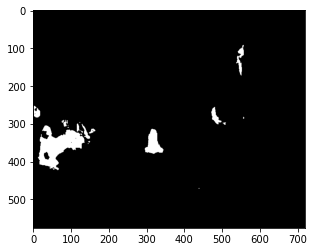

In [16]:
import matplotlib.pyplot as plt

plt.imshow(thresh1)
plt.imsave('stigrancavoli.png', thresh1)

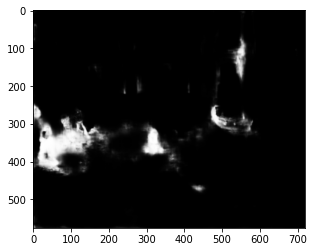

In [20]:
plt.imshow(img[:,:,::-1])

In [36]:
#for img_p in test_frames:
import os
import re
import numpy as np
from PIL import Image
for img_p in [f for f in os.listdir('/content/Human-Instance-Segmentation/data/Annotations/pID7') if re.match(r'[0-9]+.*\.png', f)]:
    print(img_p)
    img = np.array(Image.open(('/content/Human-Instance-Segmentation/data/JPEGImages/pID7/'+img_p).replace('.png', '.jpg')))
    mask = np.array(Image.open('/content/Human-Instance-Segmentation/data/Annotations/pID7/'+img_p))
    mask = mask//np.max(mask)
    im_over = np.ndarray(img.shape)
    im_over[:, :, 0] = (1 - mask) * img[:, :, 0] + mask * (overlay_color[0]*transparency + (1-transparency)*img[:, :, 0])
    im_over[:, :, 1] = (1 - mask) * img[:, :, 1] + mask * (overlay_color[1]*transparency + (1-transparency)*img[:, :, 1])
    im_over[:, :, 2] = (1 - mask) * img[:, :, 2] + mask * (overlay_color[2]*transparency + (1-transparency)*img[:, :, 2])
    plt.imshow(im_over.astype(np.uint8))
    plt.axis('off')
    plt.show()
    plt.pause(0.01)
    plt.clf()

00200.png


ValueError: ignored

In [0]:
    img = np.array(Image.open(os.path.join('DAVIS', 'JPEGImages', '480p', seq_name, img_p)))
    mask = np.array(Image.open(os.path.join(result_path, frame_num+'.png')))
    mask = mask//np.max(mask)
    im_over = np.ndarray(img.shape)
    im_over[:, :, 0] = (1 - mask) * img[:, :, 0] + mask * (overlay_color[0]*transparency + (1-transparency)*img[:, :, 0])
    im_over[:, :, 1] = (1 - mask) * img[:, :, 1] + mask * (overlay_color[1]*transparency + (1-transparency)*img[:, :, 1])
    im_over[:, :, 2] = (1 - mask) * img[:, :, 2] + mask * (overlay_color[2]*transparency + (1-transparency)*img[:, :, 2])
    plt.imshow(im_over.astype(np.uint8))
    plt.axis('off')
    plt.show()
    plt.pause(0.01)
    plt.clf()